## 디지털 마케팅이란
- 특정 목표를 위해 기업 또는 기업의 서비스, 제품, 브랜드 등을 ***온라인으로 고객에게 알리는 행위***
- 노출 ▶ 인지 ▶ 탐색 ▶ 전환/구매 ▶ 팬 ▶ 노출
  - 노출 : 광고가 노출됨에 따라 회사 또는 제품을 알림
  - 인지 : 노출된 광고를 통해 사용자가 회사 또는 제품을 사용자가 인지
  - 탐색 : 사용자가 인지한 회사 또는 제품을 사용자가 찾는 과정(검색한다거나 클릭한다거나)
  - 전환/구매 : 탐색된 제품이나, 인지 단계에 의해 사용자가 알게된 제품이 회사나 제품의 의도에 맞게 사용자가 행동.
    - 전환의 의미가 보통은 구매에 해당하나, 회사의 광고로 인해 사용자가 직접 구매 사이트까지 들어오는 것을 전환이라고도 이야기 한다.
  - 팬 : 전환/구매된 제품이 마음에 들어 사용자가 해당 제품의 팬이 되는 과정
    - 회사는 사용자의 구매를 목표로 광고를 하지만 구매를 하지 않은 사용자는 마케팅 비용이 더 들어가버린 사용자가 될 수 있기 때문에, 그 제품의 팬이 되는 것을 목표로 삼아야 한다.

## 디지털 마케팅의 종류
- 트위터, 인스타그램, 페이스북 등 SNS을 이용한 바이럴 마케팅이 대표적인 디지털 마케팅
- 이메일, SEO, Paid Search 등을 이용해 온라인상 디지털 마케팅을 하는 경우도 매우 많다.

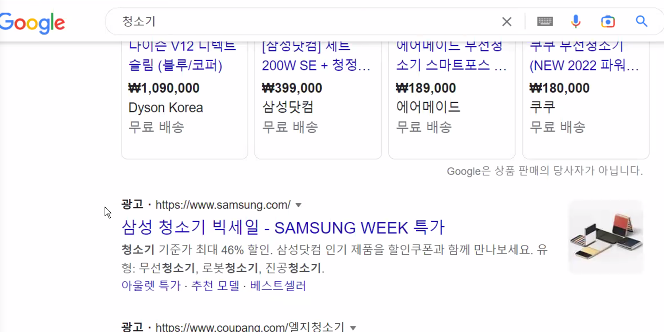

paid search 돈주고 상위에뜨게하는거

## 용어 정리
- 광고 채널(Channel)
  - 인스타그램, 카카오톡, 네이버 검색
- 광고 캠페인(Campaign)
  - 채널 안에 여러 개의 광고를 만든다. 그 각각을 캠패인이라고 부른다.
- 노출(Impression)
  - 유저가 캠패인을 한 번이라도 봤다면, 노출되었다고 표현한다.
- 전환(Conversion)
  - 유저가 캠페인을 보고 우리가 원하는 행동을 했다면 ***전환***했다고 표현한다.
    - 일반적으로 구매를 의미한다.


In [1]:
import numpy as np
import pandas as pd

# 데이터로딩

In [2]:
FILE_PATH = "/content/drive/MyDrive/멀티캠퍼스 9회차 I반/강사님과 머신러닝 프로젝트/data/attribution_data.csv"
df = pd.read_csv(FILE_PATH)
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


client가 server에 접속하면 session이라는 공간이 생김. client가 서버와 접속을 끊으면 session이 사라짐

cookie는 (서버정보, 뭘클릭했고, 뭘봤고.. 행위에 대한 기록들이 남아있음)
서버와 클라이언트의 연결이 끊어져도 client의 정보들이 저장되어있음

쿠팡에서 10개보고 나갔다왔는데도 최근본목록에 남아있는경우!!

* Cookie: 브라우저를 이용해 사이트에 방문한 사용자들에게 부여된 랜덤한 쿠키의 ID
* Timestamp: 사이트에 방문한 시간(쿠키 기록 시간)
* Interaction: 사이트에 방문한 사용자에게 광고가 노출 되었는지, 전환 까지 이루어 졌는지에 대한 카테고리 변수 
* Conversion: 0 : 실제 구매가 이루어지지 않음. 1 : 실제 구매가 이루어 졌음
* Conversion Value: 전환의 가치
* Channel: 마케팅에 대한 온라인 채널


In [4]:
# 유저별로 몇개의 채널에 노출되었는지 확인
#- ex) insta, insta, facebook : 2개의 채널에 노출된거

df_channels_per_cookie = df.groupby("cookie")["channel"].nunique().reset_index()
df_channels_per_cookie.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


In [8]:
# 채널수별 유저수
df_channels_per_cookie.groupby("channel")['cookie'].count().reset_index() # 이미 cookie들은 unique해서 count해줘도됨

# 해석 똑같은 광고를 인스타, 페북, 홈페이지에서 3번이나본 사람 9549명

,channel,cookie
0,1,183020
1,2,45964
2,3,9549
3,4,1473
4,5,102


# 도메인 지식을 활용한 채널 기여도 분석
- 도메인 지식을 활용한다 = 우리가 기존에 알고 있는, 또는 기존에 잘 알려진 방법론을 사용해 본다.
- 어떤 채널이 전환에 대한 기여도가 높았는지 살펴보자.

내가 페이스북에 광고를 올렸을때 얼마나 전환(구매)가 잘되냐?
내가 인스타에 올렸을땐 잘됐나?
왜냐하면 5번 노출이 됐어도 전환 안할수도 있기 때문에

## Last Interaction Attribution(기여) Model⭐⭐
- 마지막으로 노출/클릭한 채널의 기여도를 100%로 계산

예를들어 인스타 > 페북 > 인스타 > paid search

마지막으로 본 paid search가 전환에 100% 기여했다! 로해석하는방법
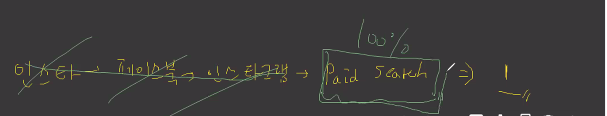

In [10]:
TEST_USER = '00000FkCnDfDDf0iC97iC703B'
df.loc[df["cookie"] == TEST_USER, :]

# 이사람의 정보가 쭉나오죵

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display


In [13]:
# 시간별 sort가 되어있어서 그냥 바로
df_last_interaction = df.drop_duplicates('cookie', keep="last")[["cookie","channel", 'conversion']]
df_last_interaction.head(10)

,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0
9,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
14,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
20,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
28,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [16]:
# 실제 전환된(구매한) 사람만 확인
df_last_interaction_conv = df_last_interaction.loc[df_last_interaction['conversion'] == 1, :]
df_last_interaction_conv.head()

,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [24]:
last_interaction_attrib = df_last_interaction_conv.groupby("channel")['cookie'].count().reset_index()
last_interaction_attrib = last_interaction_attrib.rename(columns={"cookie" : "attribution"})
last_interaction_attrib

,channel,attribution
0,Facebook,5301
1,Instagram,2244
2,Online Display,2139
3,Online Video,3408
4,Paid Search,4547


# first interaction attiribution model ⭐⭐
- 고객이 노출된 첫 번째 채널이 전환에 100% 기여했다고 간주

인스타 > 페북 > 유튜브 > 페북 > 전환(구매)

인스타가 100% 기여했다.

In [ ]:
# 각 user가 첫번째 노출된 channel찾고 마지막노출+전환을 merge할거
# 마지막광고를 보고 구매한거기때문


In [28]:
# 유저가 처음으로 노출된 채널을 조회
df_first_interaction = df.drop_duplicates("cookie", keep="first")[['cookie','channel','conversion']]
df_first_interaction.head(10)

# 여기 conversion은 의미가 없음

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,Instagram,0
4,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
10,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
17,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
24,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [29]:
# 마지막 채널의 광고를 보고 전환된 유저를 가지고 있는 데이터
df_last_interaction_conv.head()

,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [30]:
df_first_interaction_conv = df_first_interaction[['cookie','channel']].merge(df_last_interaction_conv[['cookie','conversion']], on='cookie')
df_first_interaction_conv.head()

# 이conversion은 마지막 광고를 보고 샀다는 의미임🧡
# 여기의 channel = 첫번째본채널

,cookie,channel,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
4,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [33]:
first_interaction_attrib = df_first_interaction_conv.groupby('channel')['cookie'].count().reset_index()
first_interaction_attrib = first_interaction_attrib.rename(columns={'cookie':'attribution'})
first_interaction_attrib

,channel,attribution
0,Facebook,5177
1,Instagram,2329
2,Online Display,2160
3,Online Video,3216
4,Paid Search,4757


# Linear interaction attribution model ⭐⭐
- 광고에 노출된 모든 채널의 기여도가 균등하다고 가정!

- ex) 전환된 유저가 2개의 채널에 노출되었다면 각 채널의 기여도는 0.5, 0.5
- 인스타100번 페북1번보고 샀다해도 인스타페북똑같이 0.5씩으로본다

In [34]:
# 중복부터 제거
# 각 사용자 별로 채널별 데이터를 1번씩 남긴다.
# 한 사용자가 하나의 채널에 여러번 노출된 경우를 제거

df_unique_channel = df.drop_duplicates(['cookie','channel'], keep='last') # 쿠키/채널이 동시에겹치는걸 지우겠다⭐⭐⭐
df_unique_channel 

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search
14,0003EfE37E93D0BC03iBhBBhF,2018-07-12T10:34:38Z,impression,0,0.0,Paid Search
15,00073CFE3FoFCn70fBhB3kfon,2018-07-21T10:52:04Z,impression,0,0.0,Instagram
...,...,...,...,...,...,...
586730,ooooEBE0o0D97ACAAAnDoi3F0,2018-07-25T20:02:08Z,impression,0,0.0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:54Z,impression,0,0.0,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video


In [35]:
df_unique_channel = df_unique_channel[['cookie', 'channel']]
df_unique_channel.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,Instagram
3,00000FkCnDfDDf0iC97iC703B,Online Display
9,0000nACkD9nFkBBDECD3ki00E,Paid Search
14,0003EfE37E93D0BC03iBhBBhF,Paid Search
15,00073CFE3FoFCn70fBhB3kfon,Instagram


In [40]:
# 나중에 기여도를 균등하게 나눌때 사용
df_unique_channel_cnt = df_unique_channel.groupby('cookie')['channel'].count().reset_index()
df_unique_channel_cnt = df_unique_channel_cnt.rename(columns={'channel' : 'channel_cnt'})
df_unique_channel_cnt

,cookie,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1
...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,1
240104,ooooEBE0o0D97ACAAAnDoi3F0,1
240105,ooooEiB0CCoEf9fiiC90Dfhfk,1
240106,ooooiBh70D3k3BfAhDFfii9h7,2


In [45]:
df_unique_channel_total = df_unique_channel.merge(df_unique_channel_cnt, on='cookie')
df_unique_channel_total.head()

,cookie,channel,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,Instagram,2
1,00000FkCnDfDDf0iC97iC703B,Online Display,2
2,0000nACkD9nFkBBDECD3ki00E,Paid Search,1
3,0003EfE37E93D0BC03iBhBBhF,Paid Search,1
4,00073CFE3FoFCn70fBhB3kfon,Instagram,1


In [52]:
df_last_interaction_conv.head()

,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [53]:
# 아까 마지막 채널구매 했던것과 merge
# default값은 inner 교집합
df_linear_interaction_conv = df_unique_channel_total.merge(df_last_interaction_conv[['cookie', 'conversion']], on='cookie')
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1


In [54]:
df_linear_interaction_conv['linear_attr'] = 1  / df_linear_interaction_conv['channel_cnt']
df_linear_interaction_conv.head(10)

,cookie,channel,channel_cnt,conversion,linear_attr
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1,1.0
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1,1.0
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1,1.0
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1,0.5
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1,0.5
5,000kiDB3D0fCfDAohCDB3ohko,Facebook,1,1,1.0
6,0033CAi9nhFf0DAA7DDCC3FAn,Online Video,1,1,1.0
7,003DDEfE3fnCo970C0oC7n30A,Online Video,1,1,1.0
8,0079okACDCofB9fDDhkE3kkB3,Paid Search,1,1,1.0
9,007C0i3CBFFEffhEiBEF3nCCh,Paid Search,1,1,1.0


In [57]:
linear_interaciton_attrib = df_linear_interaction_conv.groupby('channel')['linear_attr'].sum().reset_index()
linear_interaciton_attrib = linear_interaciton_attrib.rename(columns={"linear_attr" : "attribution"})
linear_interaciton_attrib

,channel,attribution
0,Facebook,4947.600000
1,Instagram,2627.100000
2,Online Display,2143.600000
3,Online Video,3192.183333
4,Paid Search,4728.516667


# 시각화

In [58]:
# 컬럼 추가해주기
last_interaction_attrib['method'] = 'last'
first_interaction_attrib['method'] = 'first'
linear_interaciton_attrib['method'] = 'linear'

In [59]:
linear_interaciton_attrib

,channel,attribution,method
0,Facebook,4947.600000,linear
1,Instagram,2627.100000,linear
2,Online Display,2143.600000,linear
3,Online Video,3192.183333,linear
4,Paid Search,4728.516667,linear


In [66]:
total_attrib = pd.concat([last_interaction_attrib,first_interaction_attrib,linear_interaciton_attrib], ignore_index=True)
total_attrib

,channel,attribution,method
0,Facebook,5301.000000,last
1,Instagram,2244.000000,last
2,Online Display,2139.000000,last
3,Online Video,3408.000000,last
4,Paid Search,4547.000000,last
5,Facebook,5177.000000,first
6,Instagram,2329.000000,first
7,Online Display,2160.000000,first
8,Online Video,3216.000000,first
9,Paid Search,4757.000000,first


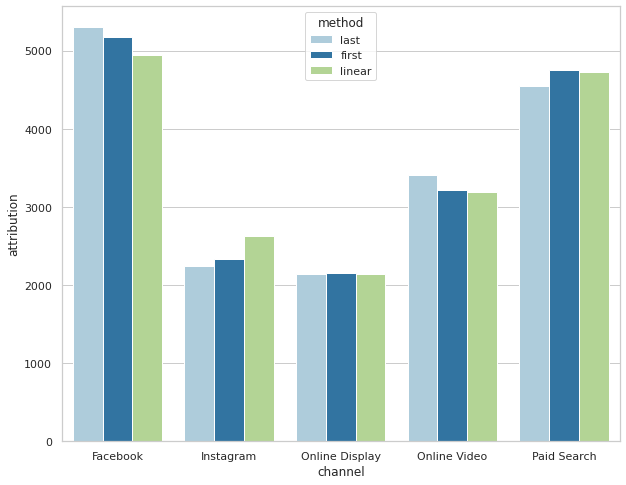

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.set_theme(style = 'whitegrid', palette='Paired')
sns.barplot(data= total_attrib, x='channel', y = 'attribution', hue='method')
plt.show()

## 해석
- facebook 과 paid search가 마케팅에서 정말 중요한 채널이다.

- facebook만 봤을땐 last attribution이 제일 높다. 사용자들이 전환을 
하기 직전에 마지막으로 본게 facebook이다

- paid search만 봤을땐 last가 젤 낮으므로 검색을하고 다른데를 돌아다니다가 구매한겨 

- instagram만 봤을땐 linear가 높다. 사용자가 여러채널을 접했을 때 인스타가 껴있을 확률이 높다.